[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Performance Scores

## Machine Learning - Supervised Learning - Classification Performance Scores / Metrics: Precision, Recall, ROC and AUC 

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 14/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0035PerformanceScoreMetrics.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import make_moons
from sklearn.metrics import auc, balanced_accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve
from sklearn.svm import SVC

# Image Processing

# Machine Learning

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotBinaryClassData, PlotConfusionMatrix, PlotLabelsHistogram


In [5]:
# General Auxiliary Functions



In [6]:
# Parameters

# Data Generation
numSamples0 = 950
numSamples1 = 50

noiseLevel = 0.1

# Test / Train Loop
testSize = 0.5

# Model
paramC      = 1
kernelType  = 'linear'

# Data Visualization
numGridPts = 250


## Generate / Load Data


In [7]:
# Load Data 

mX, vY = make_moons(n_samples = (numSamples0, numSamples1), noise = noiseLevel)

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')
print(f'The unique values of the labels: {np.unique(vY)}')

The features data shape: (1000, 2)
The labels data shape: (1000,)
The unique values of the labels: [0 1]


### Plot Data

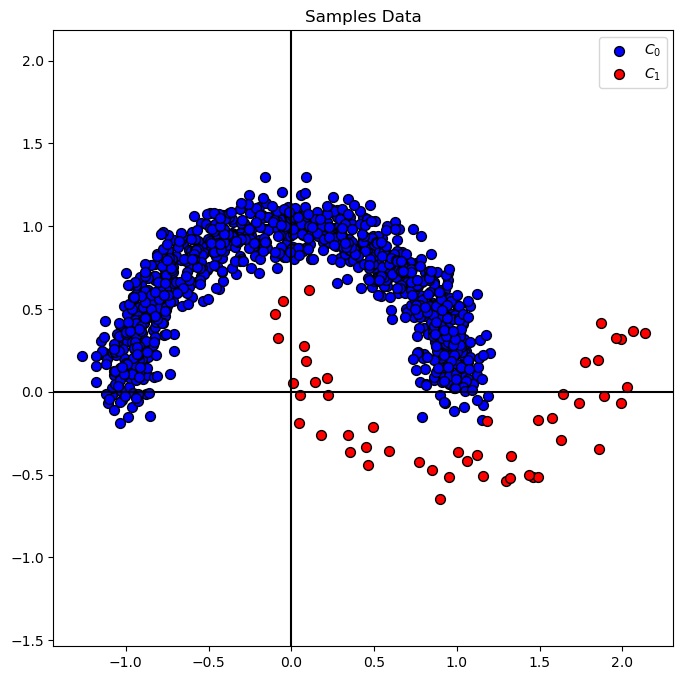

In [8]:
# Plot the Data

# Class Indices
vIdx0 = vY == 0
vIdx1 = vY == 1

hA = PlotBinaryClassData(mX, vY, axisTitle = 'Samples Data')

### Distribution of Labels

When dealing with classification, it is important to know the balance between the labels within the data set.

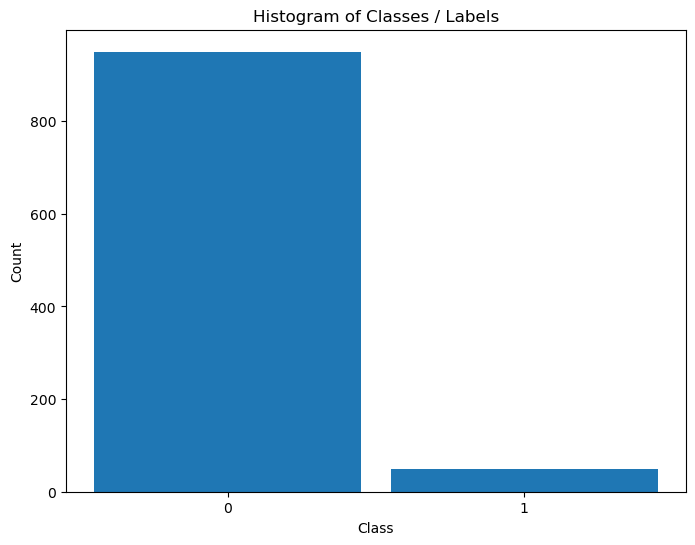

In [9]:
# Distribution of Labels

hA = PlotLabelsHistogram(vY)
plt.show()

* <font color='brown'>(**#**)</font> The data above is highly _Imbalanced / Unbalanced Data_. It happens
* <font color='brown'>(**#**)</font> _Imbalanced Data_, while being frequent in real world problems, requires delicate handling both in metric and model tuning.

## Train SVM Classifier

In [10]:
# SVM Linear Model
oSVM  = SVC(C = paramC, kernel = kernelType).fit(mX, vY) #<! We can do the training in a one liner (Chaining)
modelScore = oSVM.score(mX, vY)

print(f'The model score (Accuracy) on the data: {modelScore:0.2%}') #<! Accuracy

The model score (Accuracy) on the data: 97.40%


### Plot Decision Boundary

We'll display, the linear, decision boundary of the classifier.

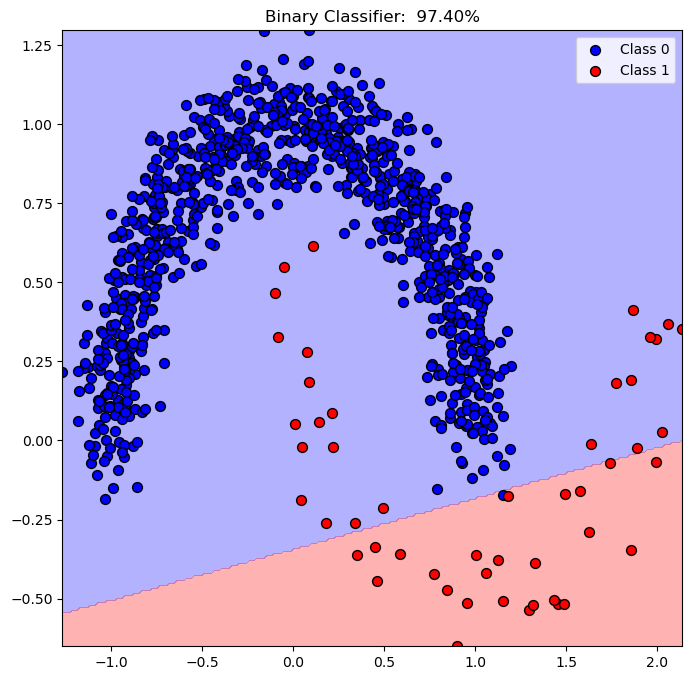

In [11]:
# Grid of the data support
v0       = np.linspace(mX[:, 0].min(), mX[:, 0].max(), numGridPts)
v1       = np.linspace(mX[:, 1].min(), mX[:, 1].max(), numGridPts)
XX0, XX1 = np.meshgrid(v0, v1)
XX       = np.c_[XX0.ravel(), XX1.ravel()]

Z = oSVM.predict(XX)
Z = Z.reshape(XX0.shape)

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA.contourf(XX0, XX1, Z, colors = CLASS_COLOR, alpha = 0.3, levels = [-0.5, 0.5, 1.5])
hA.scatter(mX[vIdx0, 0], mX[vIdx0, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[0], edgecolor = EDGE_COLOR, label = 'Class 0')
hA.scatter(mX[vIdx1, 0], mX[vIdx1, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[1], edgecolor = EDGE_COLOR, label = 'Class 1')
hA.set_title(f'Binary Classifier: {oSVM.score(mX, vY): 0.2%}')
hA.legend()
plt.show()

* <font color='red'>(**?**)</font> Describe the decision score of the points.

## Performance Metrics / Scores

Metrics / Scores are not limited as the loss of the model.  
Their role are:
 
 * Reflect the real world effect of the model.
 * A method to optimize _hyper parameters_ (Model selection included).

The requirements of the model are usually set by scores before the actual work is done.

* <font color='brown'>(**#**)</font> While in the course we introduce the _classic_ metrics. In practice use what makes sense.  
  For instance, for autonomous driving model the score can be number of accidents per 1,000,000 [Kilo Meter].

### Display the Confusion Matrix

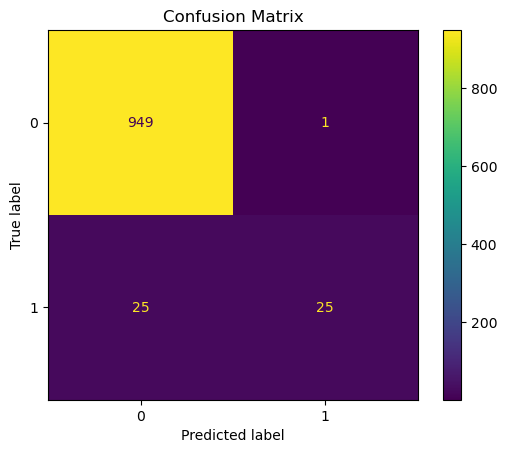

In [12]:
# Plot the Confusion Matrix

PlotConfusionMatrix(vY, oSVM.predict(mX), lLabels = oSVM.classes_)
plt.show()

### Compute the Scores: Precision, Recall and F1

In [13]:
# Calculating the Scores
vHatY                    = oSVM.predict(mX)
precision, recall, f1, support = precision_recall_fscore_support(vY, vHatY, pos_label = 1, average = 'binary')

print(f'Precision = {precision:0.3f}')
print(f'Recall    = {recall:0.3f}'   )
print(f'f1        = {f1:0.3f}'       )
print(f'Support   = {support}'  )

Precision = 0.962
Recall    = 0.500
f1        = 0.658
Support   = None


* <font color='red'>(**?**)</font> What would be the values of the scores if the accuracy was `100%`?
* <font color='brown'>(**#**)</font> In the context of _signal processing_ (RADAR, Communication) _recall_ is called _PD_ (Probability of Detection).

In [21]:
from sklearn.metrics import classification_report
## print classification_report
vYpred = oSVM.predict(mX)
print(classification_report(vY, vYpred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       950
           1       0.96      0.50      0.66        50

    accuracy                           0.97      1000
   macro avg       0.97      0.75      0.82      1000
weighted avg       0.97      0.97      0.97      1000



### Balanced Accuracy

Defined as:

$$ \texttt{Balanced Accuracy} = \frac{1}{2} \left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP} \right) $$

Which is the average of _sensitivity_ (True Positive Rate) and _specificity_ (True Negative Rate).  
Alternatively, can be thought and calculated as the _recall_ per class (For _Multi Class_).

<!-- ![](https://i.imgur.com/cYs3Qqs.png) -->

* <font color='brown'>(**#**)</font> See [Wikipedia - Sensitivity and Specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity).

In [14]:
# Balanced Accuracy: Average of TPR (Recall / Sensitivity) and TNR (Specificity)
_, specificity, _, _   = precision_recall_fscore_support(vY, vHatY, pos_label = 0, average = 'binary') #<! Pay attention to the definition of `pos_label`

bAcc = 0.5 * (recall + specificity)

print(f'Accuracy          = {modelScore:0.2%}')
print(f'Balanced Accuracy = {bAcc:0.2%}')

Accuracy          = 97.40%
Balanced Accuracy = 74.95%


In [15]:
# SciKit Learn Balanced Accuracy
# The `balanced_accuracy_score` can be used in binary and multi class cases.

print(f'Balanced Accuracy = {balanced_accuracy_score(vY, vHatY):0.2%}')

Balanced Accuracy = 74.95%


### ROC and AUC

In [16]:
# Calculating the AUC
vScore         = oSVM.decision_function(mX) #<! Values proportional to distance from the separating hyperplane
print(f"vSRocre: {vScore.shape}")

vFP, vTP, vThr = roc_curve(vY, vScore, pos_label = 1)
print(f'vFP: {vFP}')
print(f'vTP: {vTP}')
print(f'vThr: {vThr}')


AUC            = auc(vFP, vTP)
print(f'AUC = {AUC}')

vSRocre: (1000,)
vFP: [0.         0.         0.         0.00105263 0.00105263 0.00210526
 0.00210526 0.00947368 0.00947368 0.02210526 0.02210526 0.02315789
 0.02315789 0.03684211 0.03684211 0.04210526 0.04210526 0.04947368
 0.04947368 0.05473684 0.05473684 0.05578947 0.05578947 0.06315789
 0.06315789 0.06526316 0.06526316 0.06631579 0.06631579 0.09263158
 0.09263158 0.12315789 0.12315789 0.16947368 0.16947368 0.21052632
 0.21052632 0.31894737 0.31894737 0.37473684 0.37473684 0.40947368
 0.40947368 1.        ]
vTP: [0.   0.02 0.48 0.48 0.6  0.6  0.62 0.62 0.64 0.64 0.66 0.66 0.68 0.68
 0.7  0.7  0.72 0.72 0.74 0.74 0.76 0.76 0.78 0.78 0.82 0.82 0.84 0.84
 0.86 0.86 0.88 0.88 0.9  0.9  0.92 0.92 0.94 0.94 0.96 0.96 0.98 0.98
 1.   1.  ]
vThr: [        inf  1.39180904  0.06276013  0.03984598 -0.1637164  -0.19672951
 -0.21068887 -0.40393213 -0.46306996 -0.73073782 -0.73127566 -0.74080558
 -0.74182694 -0.88437818 -0.88573755 -0.96699076 -0.97343678 -1.06392795
 -1.0643795  -1.08651963 -1.09

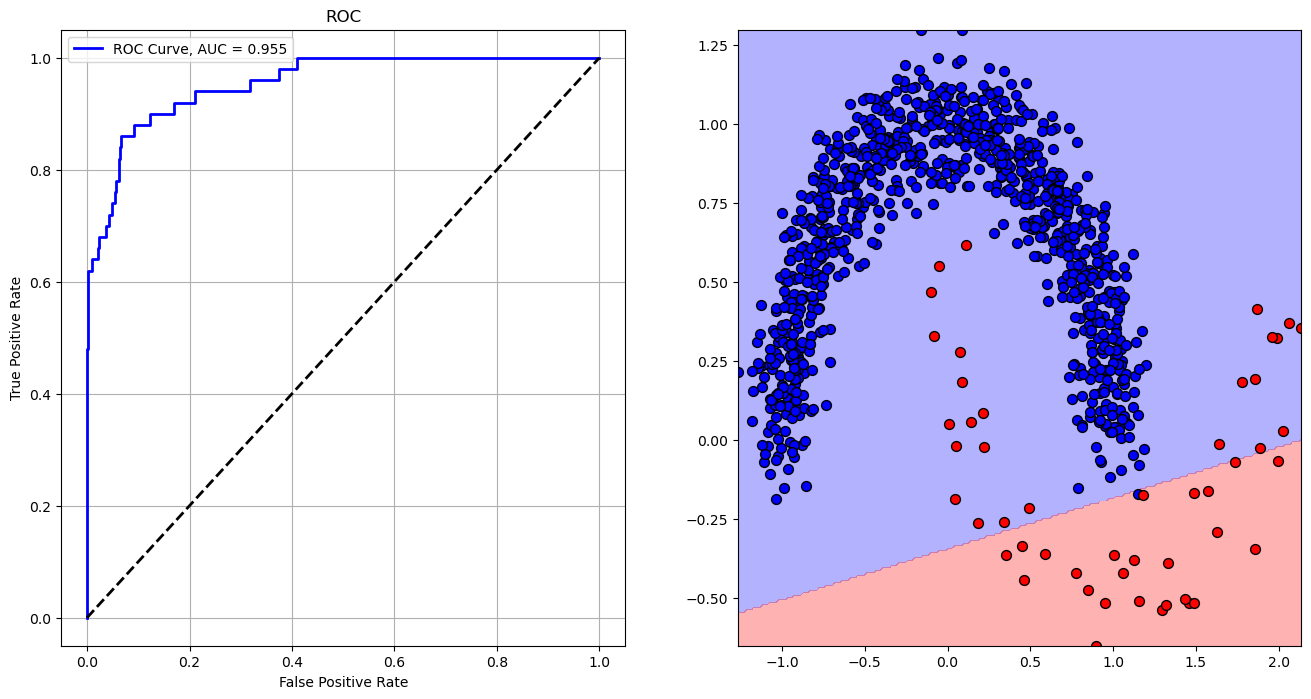

In [17]:
# Plotting the ROC

hF, vHA = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

hA = vHA.flat[0]
hA.plot(vFP, vTP, color = 'b', lw = 2, label = f'ROC Curve, AUC = {AUC:.3f}')
hA.plot([0, 1], [0, 1], color = 'k', lw = 2, linestyle = '--')
hA.set_xlabel('False Positive Rate')
hA.set_ylabel('True Positive Rate')
hA.set_title('ROC')
hA.grid()
hA.legend()

hA = vHA.flat[1]
hA.contourf(XX0, XX1, Z, colors = CLASS_COLOR, alpha = 0.3, levels = [-0.5, 0.5, 1.5])
hA.scatter(mX[vIdx0, 0], mX[vIdx0, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[0], edgecolor = EDGE_COLOR)
hA.scatter(mX[vIdx1, 0], mX[vIdx1, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[1], edgecolor = EDGE_COLOR)

plt.show()

In [18]:
vScore = oSVM.decision_function(XX)
mScore = vScore.reshape(XX0.shape)

def PlotRoc(idx):
    _, vAx = plt.subplots(1, 2, figsize = (14, 6))
    hA = vAx[0]
    hA.plot(vFP, vTP, color = 'b', lw = 3, label = f'AUC = {AUC:.3f}')
    hA.plot([0, 1], [0, 1], color = 'k', lw = 2, linestyle = '--')
    hA.axvline(x = vFP[idx], color = 'g', lw = 2, linestyle = '--')
    hA.set_xlabel('False Positive Rate')
    hA.set_ylabel('True Positive Rate')
    hA.set_title ('ROC' f'\n$\\alpha = {vThr[idx]}$')
    hA.axis('equal')
    hA.legend()
    hA.grid()    
    
    Z  = mScore > vThr[idx]
    hA = vAx[1]
    hA.contourf(XX0, XX1, Z, colors = CLASS_COLOR, alpha = 0.3, levels = [0, 0.5, 1.0])
    hA.scatter(mX[vIdx0, 0], mX[vIdx0, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[0], edgecolor = EDGE_COLOR)
    hA.scatter(mX[vIdx1, 0], mX[vIdx1, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[1], edgecolor = EDGE_COLOR)

    plt.show()
    


In [19]:
idxSlider = IntSlider(min = 0, max = len(vThr) - 1, step = 1, value = 0, layout = Layout(width = '30%'))
interact(PlotRoc, idx = idxSlider)

plt.show()

interactive(children=(IntSlider(value=0, description='idx', layout=Layout(width='30%'), max=43), Output()), _d…